# Business Understanding

# Data Understanding

# Data Preparation

In [2]:
# import all necessary packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import random
%matplotlib inline
plt.style.use('ggplot')

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import scipy.stats as stats

In [3]:
# reading the csv file
df = pd.read_csv('data/kc_house_data.csv')
# previewing the DataFrame
df.head() 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [4]:
# Checking list of all columns  
df.columns.tolist()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'greenbelt',
 'nuisance',
 'view',
 'condition',
 'grade',
 'heat_source',
 'sewer_system',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'address',
 'lat',
 'long']

Columns

- id - Unique ID for each home sold
- date - Date of the home sale
- price - Price of each home sold
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living - Square footage of the apartments interior living space
- sqft_lot - Square footage of the land space
- floors - Number of floors
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
- greenbelt - natural, undeveloped, and/or agricultural lands that surround urban areas
- nuisance
- view - An index from 0 to 4 of how good the view of the property was
- condition - An index from 1 to 5 on the condition of the apartment,
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
- heat_source 
- sewer_system - A sanitary sewer
- sqft_above - The square footage of the interior housing space that is above ground level
- sqft_basement - The square footage of the interior housing space that is below ground level
- sqft_garage - Square footage of the garage
- sqft_patio - Square footage of the patio
- yr_built - The year the house was initially built
- yr_renovated - The year of the house’s last renovation
- address
- lat - Lattitude
- long - Longitude

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [6]:
# generating descriptive statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [7]:
#Detecting missing values
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [14]:
df.drop(columns=[ 'id'], inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


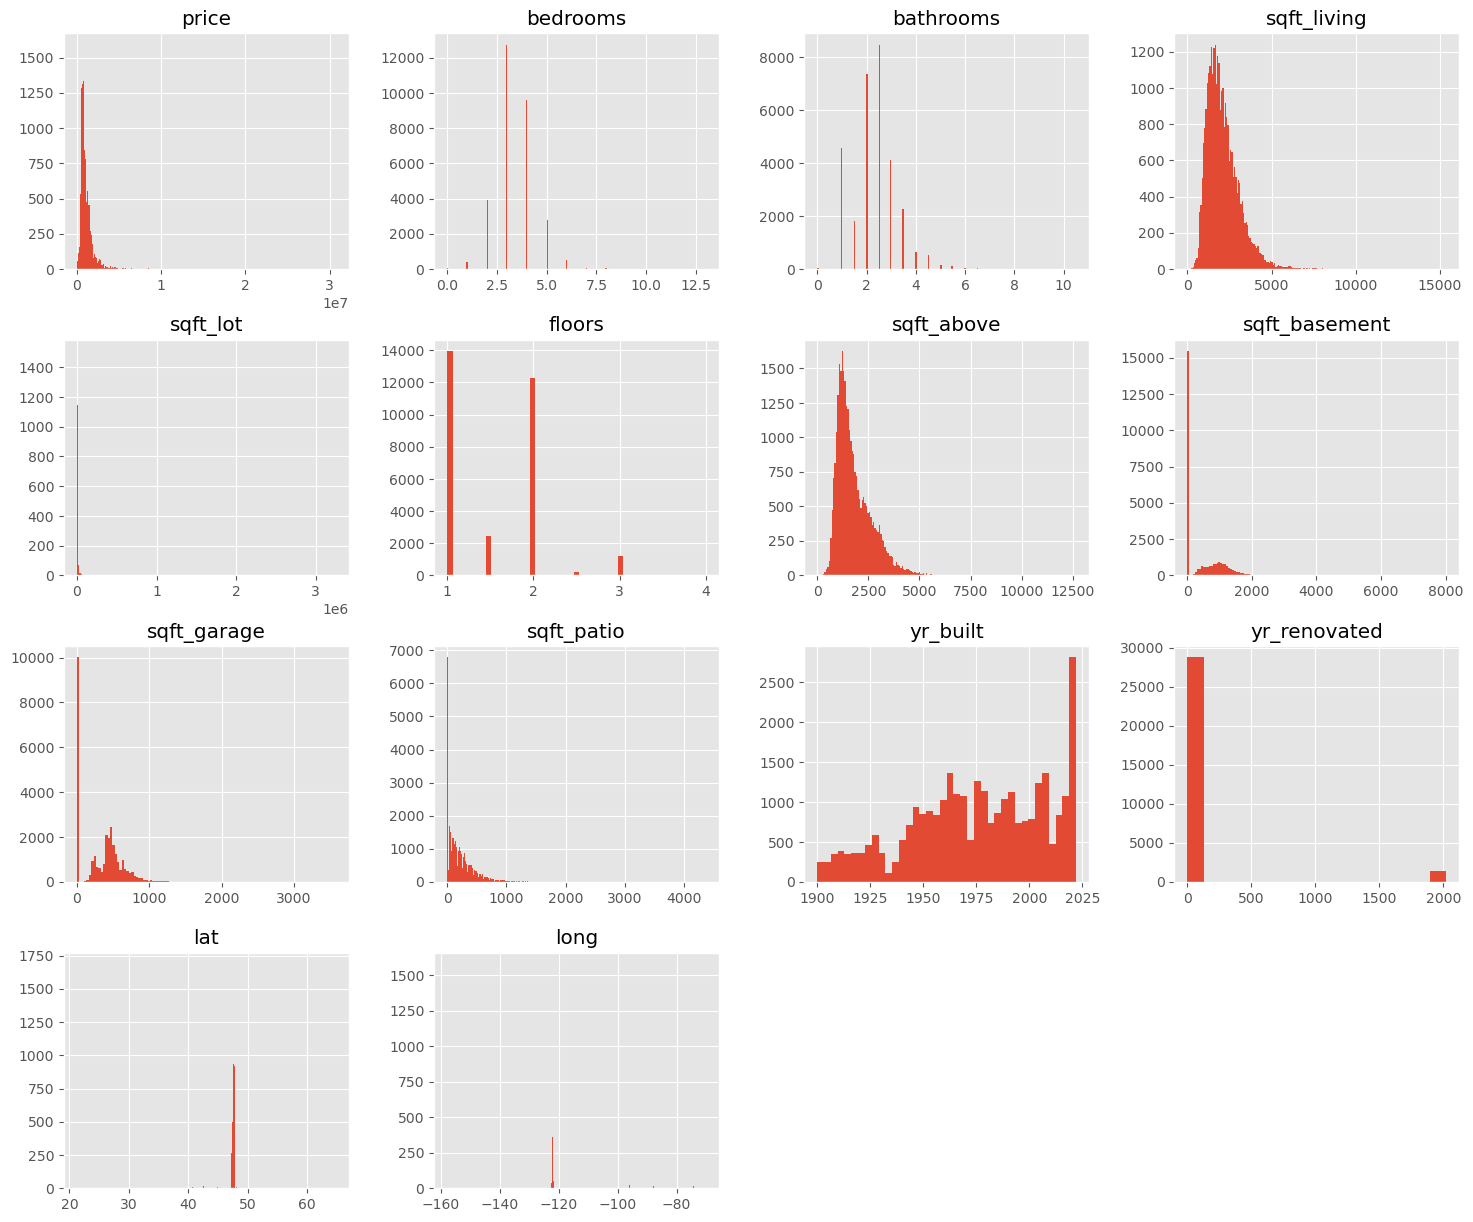

In [15]:
# histograms across all columns

df.hist(figsize=(18,15), bins='auto');

In [8]:
#chechinf mean of the price range
std = df.price.std()
print('std: ',std)
mean = df.price.mean()
print('mean: ', mean)
std_1 = mean + std
std_1m = mean - std
print('mean +1 std: ',std_1)
print('mean -1 std: ',std_1m)

std:  896385.6591926547
mean:  1108535.837871
mean +1 std:  2004921.4970636545
mean -1 std:  212150.17867834528


 I want to find out what is the most expensive and cheapest neighborhoods.

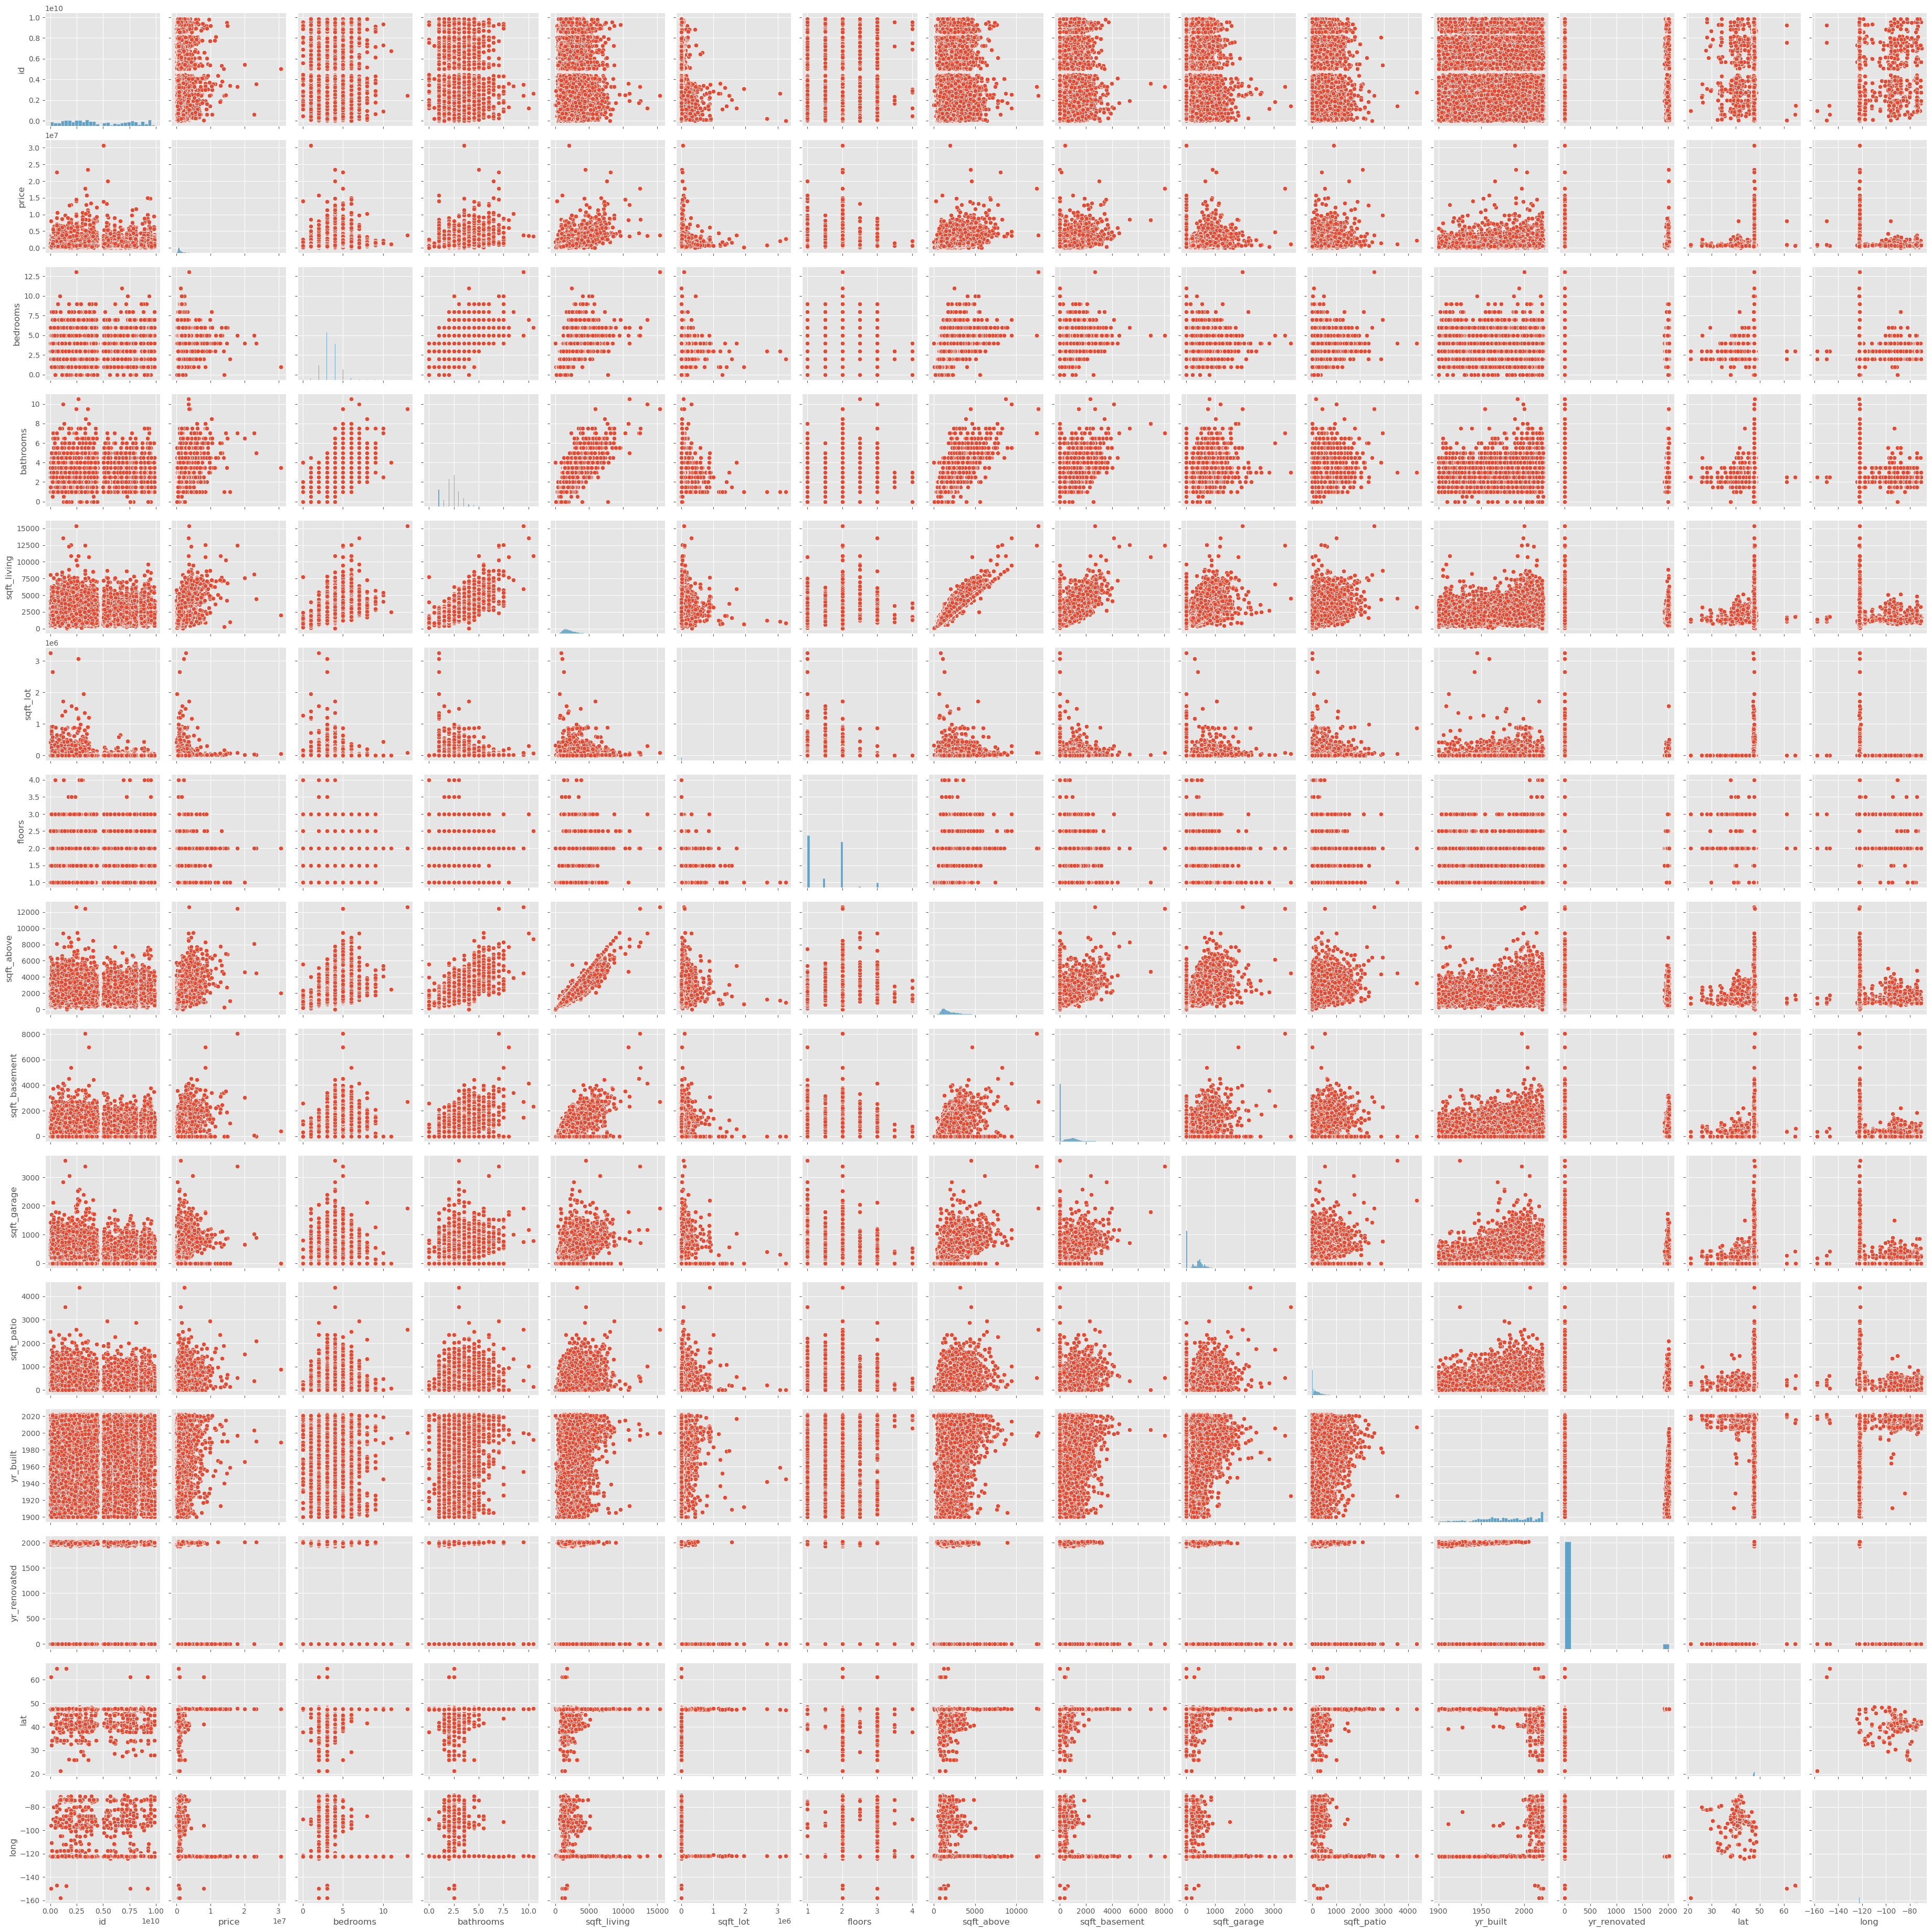

In [9]:
sns.pairplot(df)

In [10]:
# I determined top of house prices. Looking at upscale homes of expensive neighborhoods 

expensive_houses = df.loc[df['price'] >= 10000000]
expensive_houses_list = list(expensive_houses['price'])
print(expensive_houses)

               id        date       price  bedrooms  bathrooms  sqft_living  \
3760   3534900325   9/23/2021  23500000.0         4        5.0         4440   
5811   2424049035   8/19/2021  13950000.0         0        1.0          290   
6106   5316100935   6/25/2021  13300000.0         6        6.0         7680   
6936   1954700021   11/1/2021  12901148.0         4        5.0        10900   
8054   9471200795  10/29/2021  14850000.0         4        3.5         4240   
8656   3835503090   7/16/2021  13425000.0         5        5.0         7140   
9374   9208900006   7/15/2021  10000000.0         3        4.5         4820   
9516   3424059021   5/16/2022  15740000.0         2        1.0         1010   
10605  9208900030   8/27/2021  15000001.0         6        6.5         6780   
11464  3534900543   5/13/2022  11400000.0         3        3.5         3680   
12712  4389200805    6/3/2022  12125000.0         4        4.5         5070   
12817  5026900300   2/18/2022  13850000.0         3 

I found out what are upscale homes of the most expensive neighborhoods. Now I want to know what are the cheapest

In [12]:
cheap_houses = df.loc[df['price'] <= 60000 ]
cheap_houses_list = list(cheap_houses['price'])
print(cheap_houses)

               id        date    price  bedrooms  bathrooms  sqft_living  \
56      521059083   8/31/2021  37440.0         4        2.5         1670   
3676   7349700580   8/31/2021  50000.0         3        1.0         1850   
4300    185000165   2/22/2022  52650.0         3        2.0         2050   
4487   3223069049  11/29/2021  47801.0         4        3.0         3440   
5617   2926139036   7/22/2021  50000.0         2        1.0         1320   
6430   1311040040    1/8/2022  40000.0         4        4.5         5780   
6509    423049165    8/3/2021  51407.0         5        2.0         1760   
7577   1626059005   11/4/2021  28307.0         2        1.0         1660   
8557   4438800170  11/27/2021  27360.0         2        1.0          730   
8622   3356401940   9/21/2021  52593.0         2        1.0          860   
8693   1827200185  11/21/2021  55000.0         3        2.5         2130   
9125   1626059046   11/4/2021  29941.0         5        1.5         2560   
9754   14440

In [ ]:
build_model(df[['price', 'address']], 'price').summary()

init_dgesdd failed init


In [16]:
#calculating the relationship between price and each column in our data set
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.608521
sqft_above       0.538651
bathrooms        0.480401
sqft_patio       0.313409
bedrooms         0.289204
sqft_garage      0.264169
sqft_basement    0.245058
floors           0.180576
yr_built         0.096013
sqft_lot         0.085730
yr_renovated     0.084786
lat              0.063632
long            -0.022509
Name: price, dtype: float64

I got the number 1.000000 in price, which makes sense, each column always has a perfect relationship with itself.
As I know I have to have at least 0.6 (or -0.6) to call it a good correlation.

Next I want to find the relationship between price and Square Feet Living and make the regression model

In [29]:
# taking only columns that I will use for my regression model
correlation = ['price', 'sqft_living']
size = df[correlation]

In [31]:
size.corr()

,price,sqft_living
price,1.000000,0.608521
sqft_living,0.608521,1.000000


Again we can see that sqft_living has correlation 0.608521 which is good correlation. Now I want to plot the graph for better visualization 

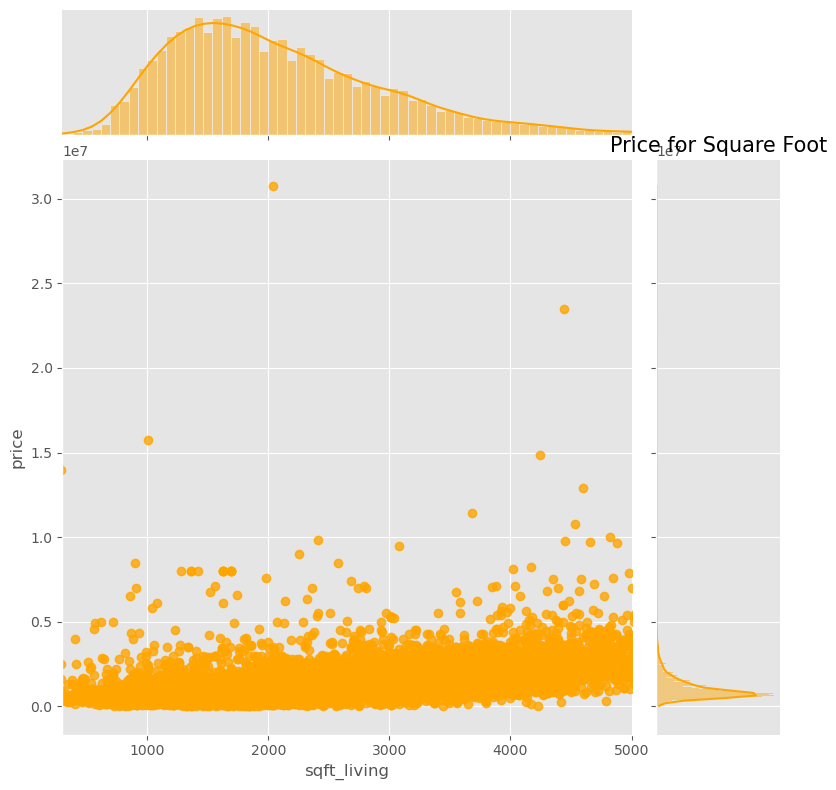

In [34]:
sns.jointplot(x = 'sqft_living', y = 'price' , data = df, kind = 'reg', height = 8, xlim = (300, 5000), 
              color = 'orange', ratio = 4)
plt.title('Price for Square Foot', fontsize = 15)
plt.ylabel('Price for sale', fontsize = 14)
plt.xlabel('Square Foot Living', fontsize = 14)
plt.show()

I want to calculate the slope to see what is the linear relationship

In [36]:
# calculating slope
def slope(xs,ys):
    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
        ((np.mean(xs)**2) - np.mean(xs*xs)))
    return m
slope(df['sqft_living'], df['price'])

560.0050219280564

As we can see the number is positive. If the slope of the line is positive, then there is a positive linear relationship. 560.0050219280564 is the number represents the estimated change in price for every sqft.

In [39]:
#calculating best fit line 
def best_fit_line(xs,ys):
    m = slope(xs,ys)
    c = np.mean(ys) - m*np.mean(xs)    
    return m, c
m, c = best_fit_line(df['sqft_living'], df['price'])
m, c

(560.0050219280564, -74432.62432965916)

I calculated best fit line for my future plot.
The line of best fit is a line that goes roughly through the middle of all the scatter points on a graph.
The closer the points are to the line of best fit the stronger the correlation is.

In [40]:
def r_line (m, c, xs):
    return [(m*x) + c for x in xs]
regression_line = r_line(m,c,df['sqft_living'])

I calculated regration line for my future plot. A regression line is a statistical tool that depicts the correlation between two variables

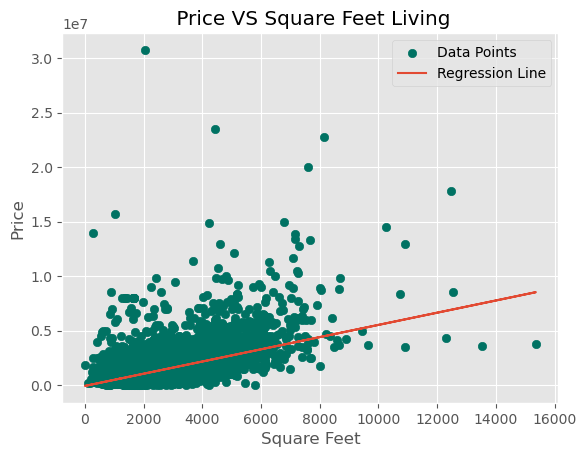

In [43]:
plt.scatter(df['sqft_living'], df['price'], color='#007263', label='Data Points')
plt.plot(df['sqft_living'], regression_line, label='Regression Line')
plt.legend()
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title(' Price VS Square Feet Living')
plt.show()

Here we can see  a positive correlation. A positive correlation shows that changes in one variable will relate to the same type of changes in a second variable.

In [93]:
# to build a model first I need to build a function
def build_model(df, outcome):
    predictors = ' + '.join(df.drop(columns=[outcome]).columns)
    formula = outcome + ' ~ ' + predictors
    model = ols(formula=formula, data=df).fit()
    return model

In [95]:
# building a model to look at the summary
build_model(df[['price', 'sqft_living']], 'price').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.773e+04
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:51:07   Log-Likelihood:            -4.4912e+05
No. Observations:               30155   AIC:                         8.982e+05
Df Residuals:                   30153   BIC:                         8.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -7.443e+04   9782.728     -7.609      0.000   -9.36e+04   -5.53e+04
sqft_living   560.0050      4.206    133.160      0.000     551.762     568.248
==============================================================================
Omnibus:                    43429.367   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47159181.471
Skew:                           8.188   Prob(JB):                         0.00
Kurtosis:                     196.042   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As wwe can see here a Square Foot Living would cost $560.00
Square Feet Living and price have weak relationship becouse correlation between is 0.370(correlation under 0.4 considered weak relationship)

In [96]:
# building a model to look at the summary
build_model(df[['price', 'grade']], 'price').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     1742.
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:12:25   Log-Likelihood:            -4.4815e+05
No. Observations:               30155   AIC:                         8.963e+05
Df Residuals:                   30142   BIC:                         8.964e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.352e+06   4.87e+05      2.776      0.006    3.98e+05    2.31e+06
grade[T.10 Very Good]   9.895e+05   4.88e+05      2.030      0.042     3.4e+04    1.95e+06
grade[T.11 Excellent]    2.19e+06   4.88e+05      4.484      0.000    1.23e+06    3.15e+06
grade[T.12 Luxury]      3.736e+06   4.91e+05      7.606      0.000    2.77e+06     4.7e+06
grade[T.13 Mansion]     6.047e+06   5.07e+05     11.925      0.000    5.05e+06    7.04e+06
grade[T.2 Substandard]  -1.05e+06   6.89e+05     -1.524      0.127    -2.4e+06       3e+05
grade[T.3 Poor]         -8.88e+05   5.23e+05     -1.697      0.090   -1.91e+06    1.38e+05
grade[T.4 Low]         -7.137e+05   4.97e+05     -1.437      0.151   -1.69e+06     2.6e+05
grade[T.5 Fair]        -7.339e+05   4.88e+05     -1.503      0.133   -1.69e+06    2.23e+05
grade[T.6 Low Average] -6.985e+05   4.87e+05     -1.433      0.152   -1.65e+06    2.57e+05
grade[T.7 Average]     -5.324e+05   4.87e+05     -1.093      0.275   -1.49e+06    4.23e+05
grade[T.8 Good]         -2.69e+05   4.87e+05     -0.552      0.581   -1.22e+06    6.86e+05
grade[T.9 Better]       2.338e+05   4.87e+05      0.480      0.631   -7.21e+05    1.19e+06
==============================================================================
Omnibus:                    40476.896   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         32436451.405
Skew:                           7.185   Prob(JB):                         0.00
Kurtosis:                     163.029   Cond. No.                         505.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Correlation betweem grade and price is considered a weak-moderate relationship.

Now I want to check how waterfront ( a part of a town that is next to an area of water such as a river or the ocean) efect the price of the house. 

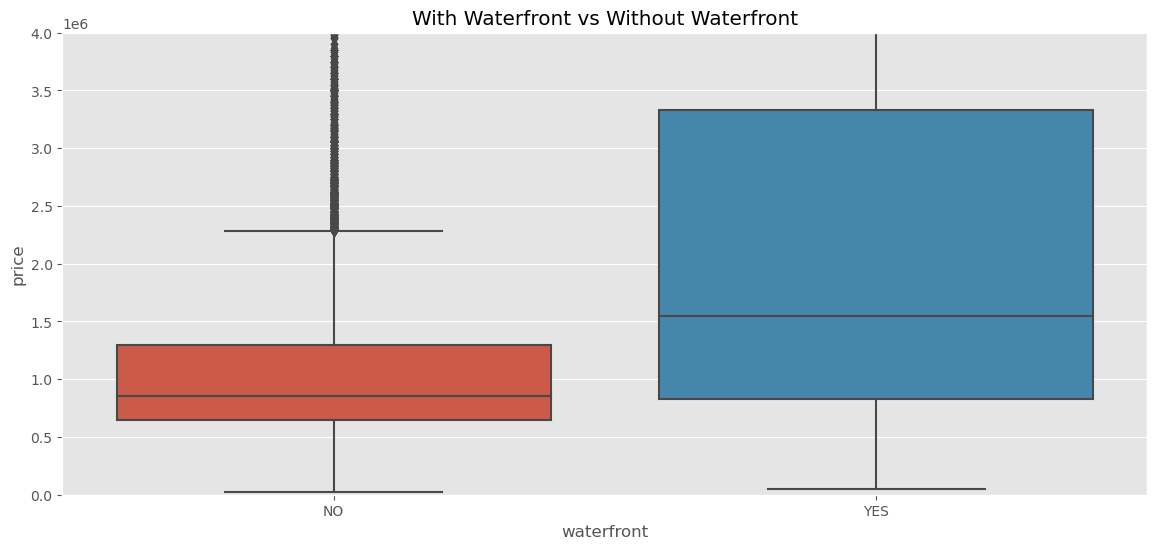

In [17]:
# Plotting plot for better vizualization of how presence of waterfront affect the price 
var = 'waterfront'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data)
ax.set_title('With Waterfront vs Without Waterfront')
fig.axis(ymin=0, ymax=4000000);


With this plot I can see that presence waterfront significant affect the price 

In [97]:
build_model(df[['price', 'waterfront']], 'price').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     1719.
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:17:18   Log-Likelihood:            -4.5526e+05
No. Observations:               30155   AIC:                         9.105e+05
Df Residuals:                   30153   BIC:                         9.105e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.081e+06   5064.675    213.436      0.000    1.07e+06    1.09e+06
waterfront[T.YES]  1.601e+06   3.86e+04     41.463      0.000    1.53e+06    1.68e+06
==============================================================================
Omnibus:                    35538.027   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10944460.954
Skew:                           5.884   Prob(JB):                         0.00
Kurtosis:                      95.585   Cond. No.                         7.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

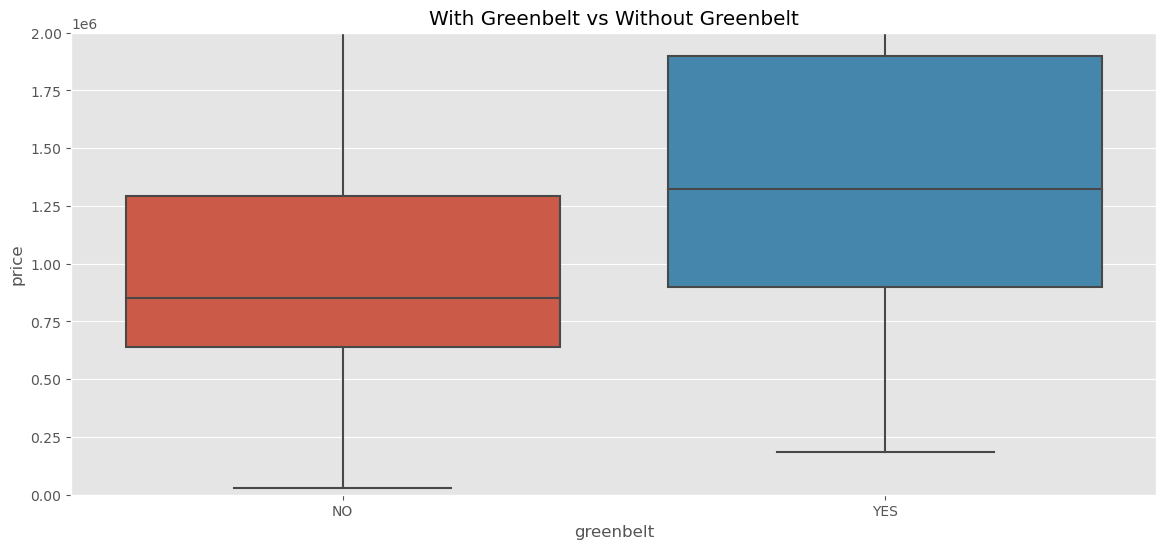

In [25]:
var = 'greenbelt'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data)
ax.set_title('With Greenbelt vs Without Greenbelt')
fig.axis(ymin=0, ymax=2000000);

Greenlent affect the price a little bit less, but still we can see that price slikely elevated

In [99]:
build_model(df[['price', 'greenbelt']], 'price').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     141.1
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           1.77e-32
Time:                        21:22:34   Log-Likelihood:            -4.5603e+05
No. Observations:               30155   AIC:                         9.121e+05
Df Residuals:                   30153   BIC:                         9.121e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.099e+06   5217.319    210.570      0.000    1.09e+06    1.11e+06
greenbelt[T.YES]  3.871e+05   3.26e+04     11.880      0.000    3.23e+05    4.51e+05
==============================================================================
Omnibus:                    38131.263   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14716007.254
Skew:                           6.655   Prob(JB):                         0.00
Kurtosis:                     110.402   Cond. No.                         6.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

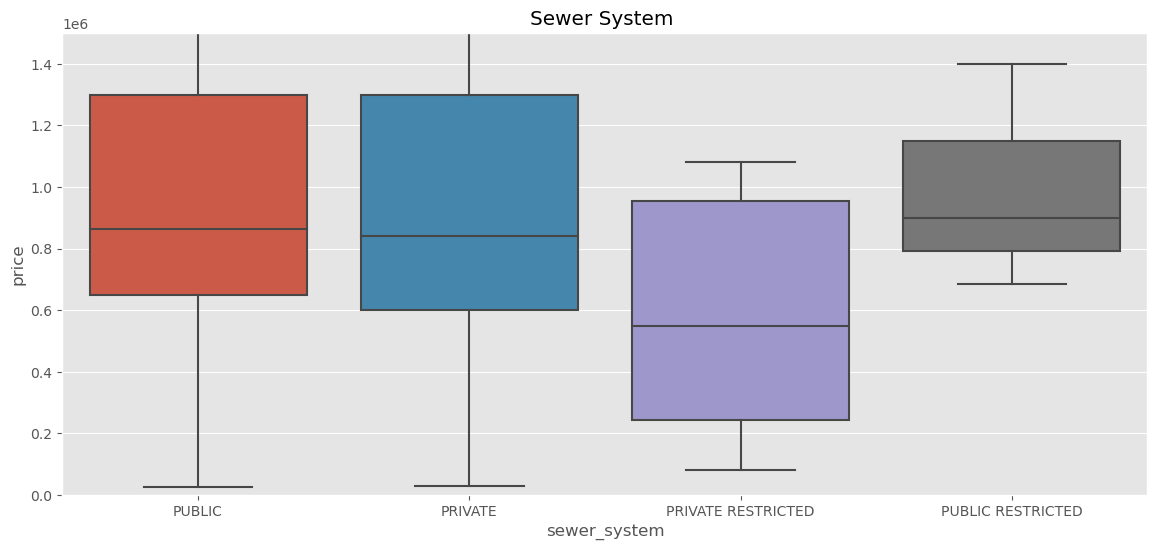

In [24]:
#Checking how sewer system affect the price
var = 'sewer_system'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data)
ax.set_title('Sewer System ')
fig.axis(ymin=0, ymax=1500000);

Sewer System does not effect price a lot slighly cheeper price we have for houses with private restricted sewer system

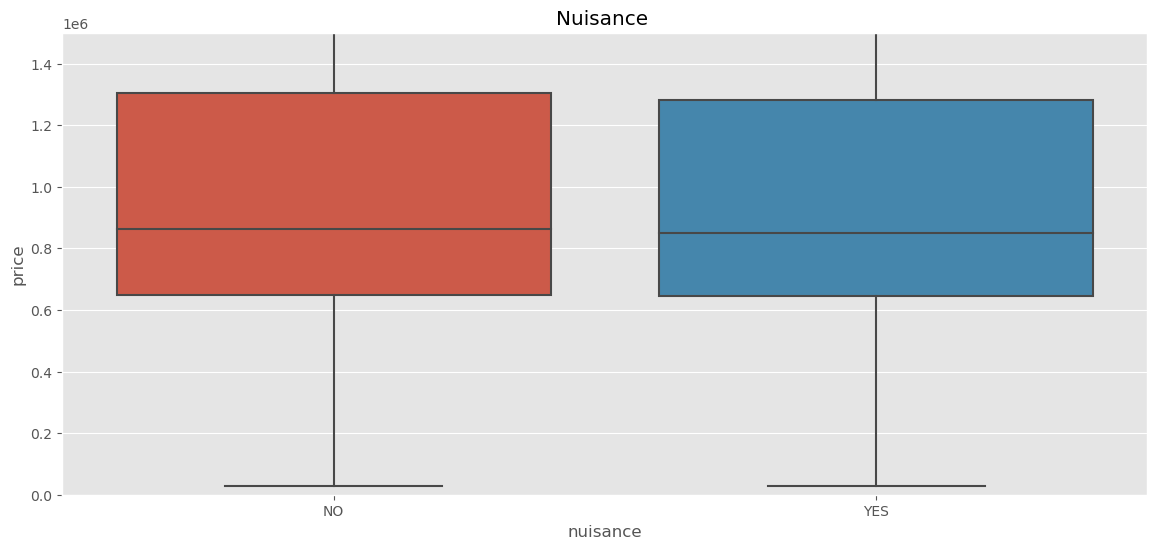

In [26]:
var = 'nuisance'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data)
ax.set_title('Nuisance ')
fig.axis(ymin=0, ymax=1500000);

Nuisance does not effect the price

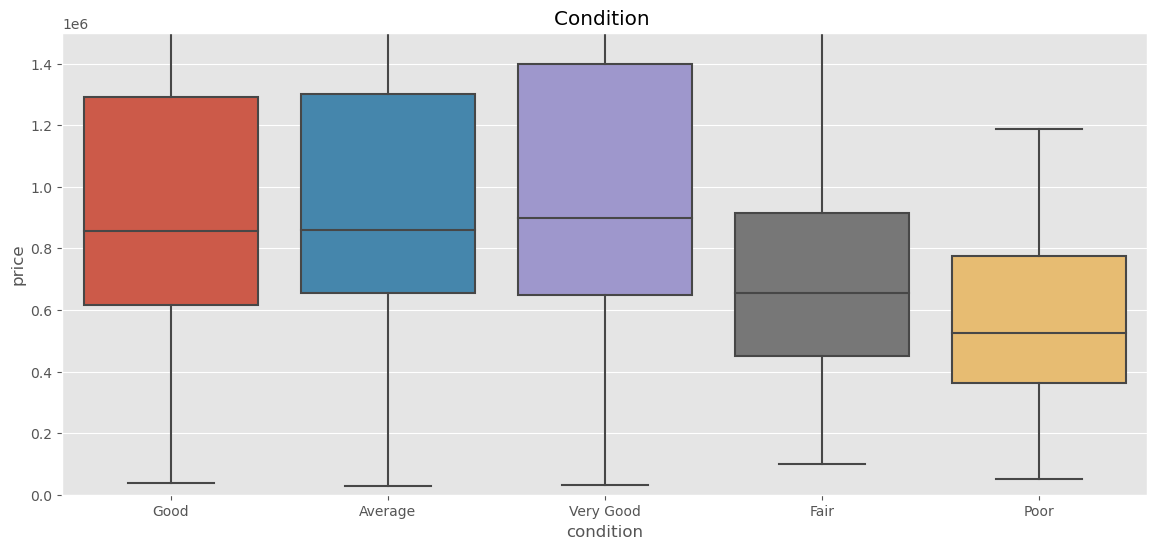

In [23]:
var = 'condition'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data)
ax.set_title('Condition ')
fig.axis(ymin=0, ymax=1500000);

Here we can see how condition effect the price. Good,Average, and Very good condition have almost the same price range same as fair and poor condition olmost on the same level.

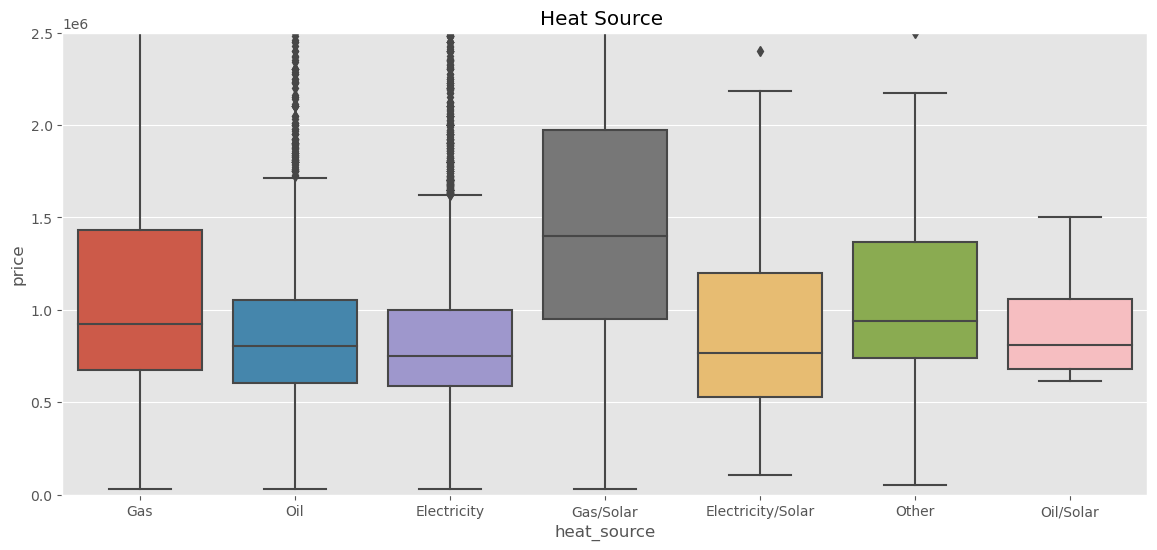

In [27]:
var = 'heat_source'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data)
ax.set_title('Heat Source ')
fig.axis(ymin=0, ymax=2500000);

Here we can see that houses with Gas/Solar heat sources are the most expensive Gas heat sources itself slightly cheaper and all the others are pretty much at the similar price range

# Modeling

# Regression Results

# Conclusion

## Recommendation

## Limitations 

## Next Steps